### **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

## ***Author - Vibha Rao***

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Check if there any null value in the Dataset
data.isnull == True


False

*There is no null value in the Dataset so, we can now visualize our Data*

Making a list of columns

In [10]:
columns = list(data.columns)

In [12]:
X = data["Hours"].values.reshape(-1,1)
Y = data["Scores"].values.reshape(-1,1)

Now We will be Visualizing Data

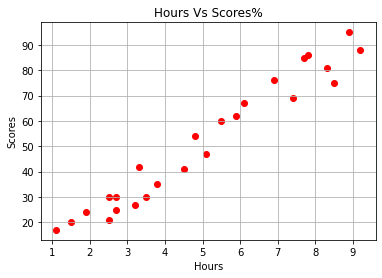

In [13]:
plt.scatter( X , Y , color = "#FF0000" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores%")
plt.grid()
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

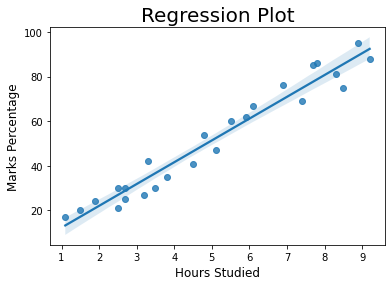

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:

sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

### Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


### Loading the modules for linear regression:

In [17]:
from sklearn.linear_model import LinearRegression

### Train Model

### 1) Splitting the Data

In [19]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [20]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")


---------Model Trained---------


### Predicting the Percentage of Marks

In [21]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### *Visualising Train Data*

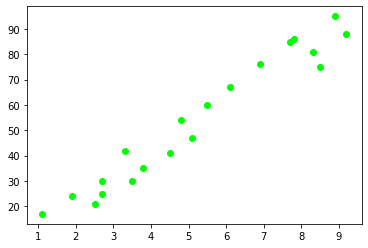

In [23]:
plt.scatter(x_train , y_train , color = "#00FF00")
plt.show()

### Visually Comparing the Predicted Marks with the Actual Marks

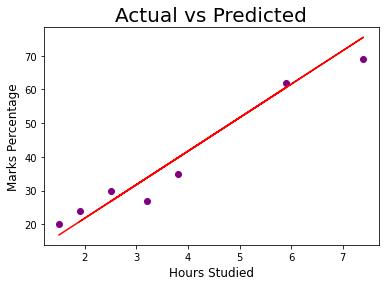

In [25]:
plt.scatter(x=val_X, y=val_y, color='purple')
plt.plot(val_X, pred_y, color='Red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


### *Making Predictions*

Evaluating the Model

In [27]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

### *Q-What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?*

In [28]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))


Score = 93.893


The predicted score if a student studies for 9.25 hrs/ day is [93.69173249] 